# **Import libraries**

In [188]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import seaborn as sns

# **Load Car evaluation data**

In [189]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/697/data.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                       

# Exploratory data analysis

## Data characteristics

To understand the shape of data, data type, missingness, unique entries for each feature and label, and distribution of each unique entries.

In [190]:
# Display basic information about the dataset
print("Basic Information:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique values in each column
print("\nUnique Entries:")
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

# Display the frequency of each unique values in each column
print("\nFrequency of Unique Entries:")
for col in df:
    print(f"\nFrequency of values in {col}:")
    print(df[col].value_counts())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification

## Segregate data

In [191]:
# Segregate the data base on its type
cat = [
    "Marital Status", 
    "Application mode", 
    "Course",
    "Previous qualification", 
    "Nacionality", 
    "Mother's qualification", 
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation"
]

bin = [
    "Daytime/evening attendance",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

ord = [
    "Application order"
]

df_cat = df[cat + ['Target']]
df_bin = df[bin + ['Target']]
df_num = df.drop(columns=cat + bin)

## Visualize data

Understand the distribution of example countes for each features and label.

### Categorical variables (more than 2 categories)

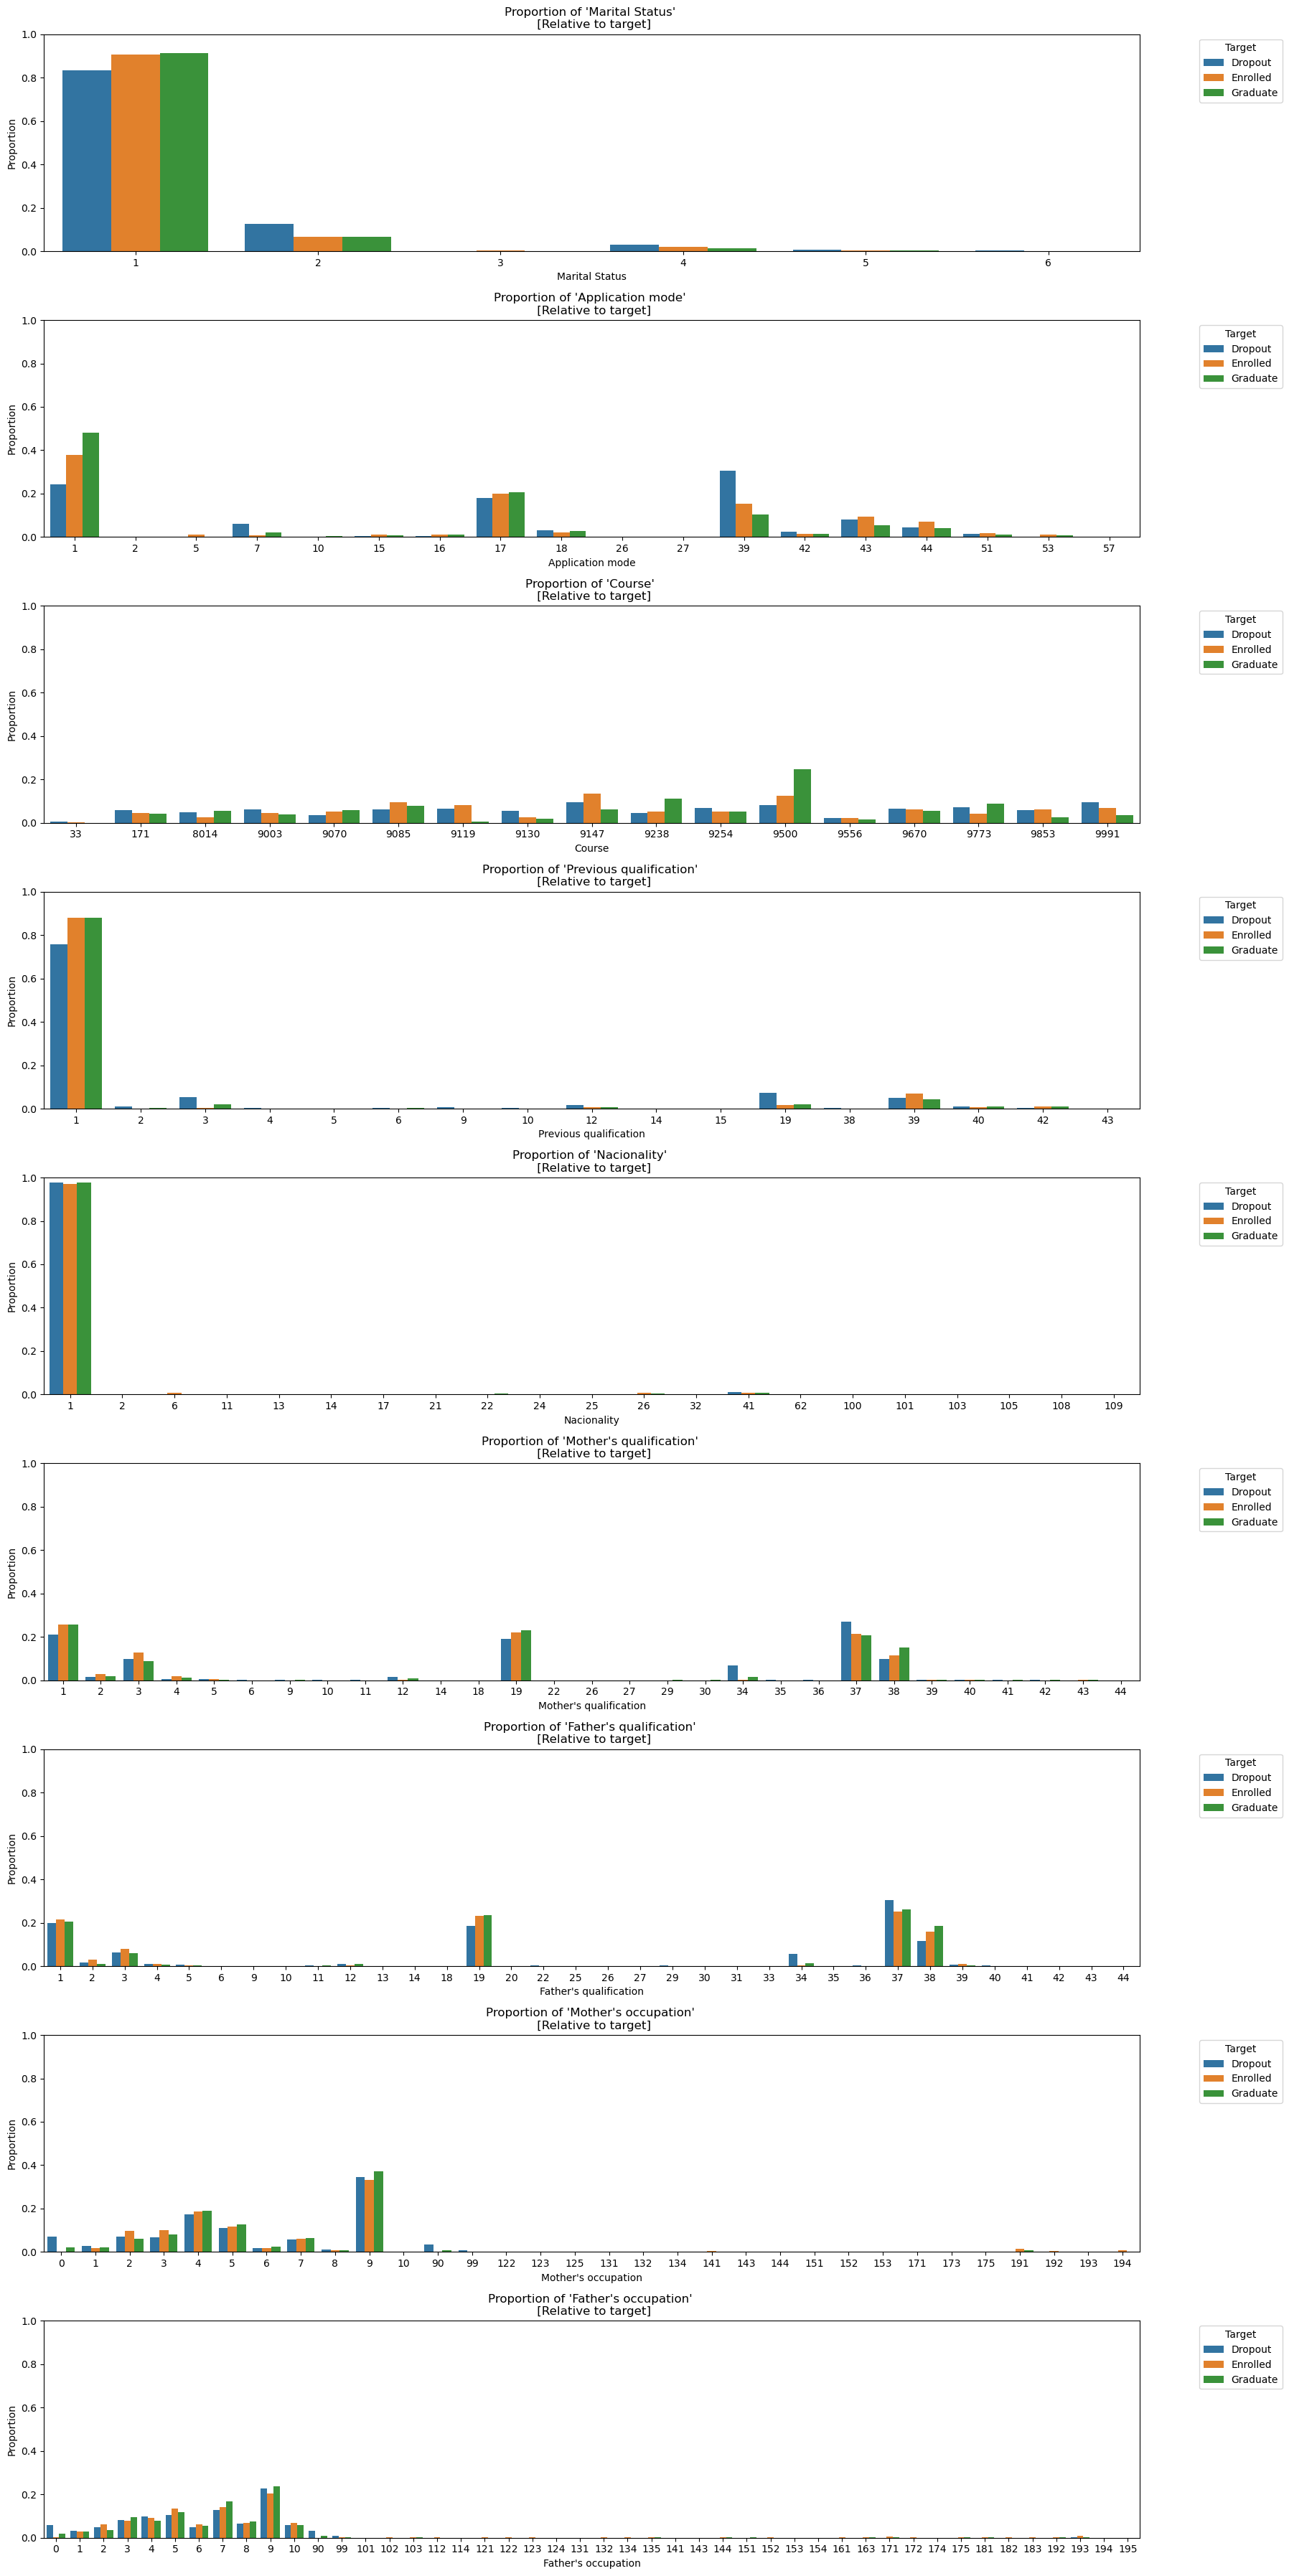

In [192]:

# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(9, 1, figsize=(18, 36))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_cat[:-1]):
    # Group by 'Target' and the current feature to get counts
    grouped = df.groupby(['Target', col]).size().reset_index(name="count")
    
    # Calculate total counts for each 'Target'
    Target_totals = df.groupby('Target').size().reset_index(name="total")
    
    # Merge totals into the grouped DataFrame
    merged = pd.merge(grouped, Target_totals, on='Target')
    
    # Compute proportion relative to the total count of each Target
    merged["prop"] = merged["count"] / merged["total"]
    
    # Create a bar plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and bars are colored by 'Target'
    sns.barplot(y="prop", x=col, hue="Target", data=merged, ax=ax)
    ax.set_title(f"Proportion of '{col}' \n [Relative to target]")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Binary

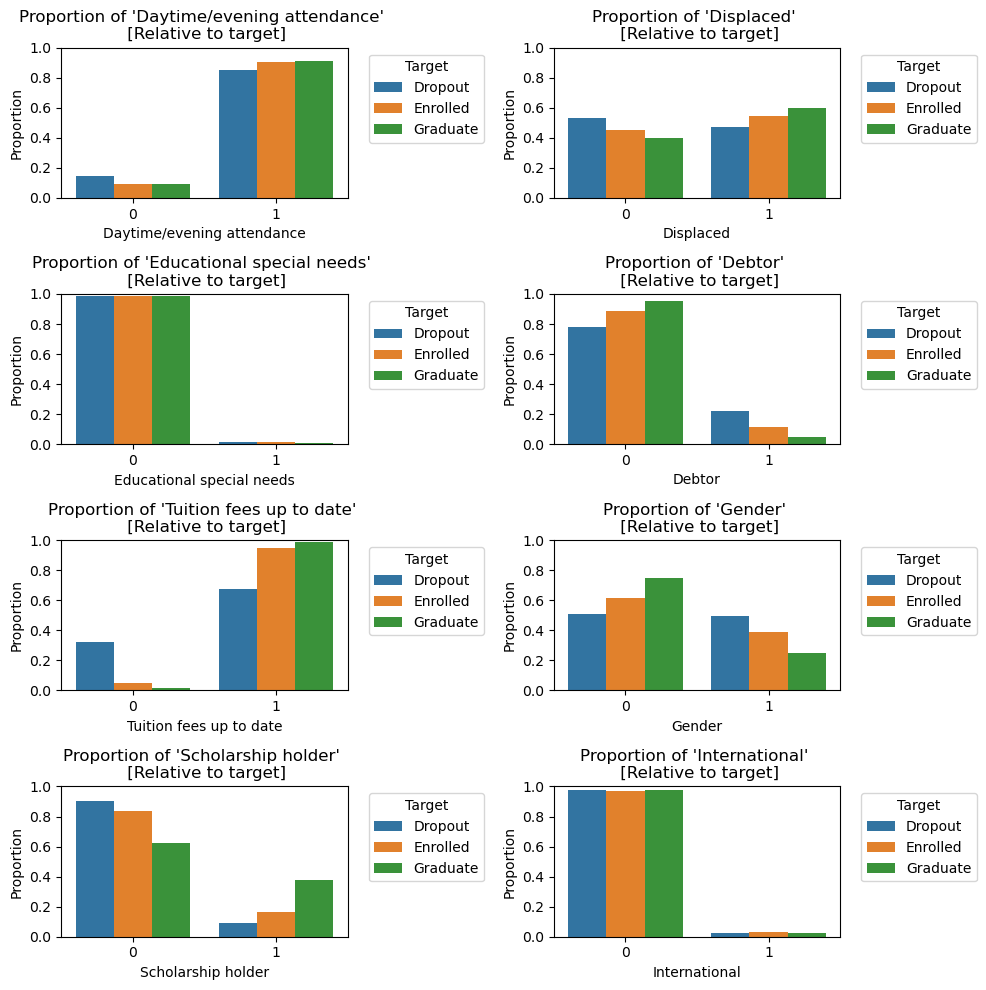

In [193]:
# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_bin[:-1]):
    # Group by 'Target' and the current feature to get counts
    grouped = df.groupby(['Target', col]).size().reset_index(name="count")
    
    # Calculate total counts for each 'Target'
    Target_totals = df.groupby('Target').size().reset_index(name="total")
    
    # Merge totals into the grouped DataFrame
    merged = pd.merge(grouped, Target_totals, on='Target')
    
    # Compute proportion relative to the total count of each Target
    merged["prop"] = merged["count"] / merged["total"]
    
    # Create a bar plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and bars are colored by 'Target'
    sns.barplot(y="prop", x=col, hue="Target", data=merged, ax=ax)
    ax.set_title(f"Proportion of '{col}' \n [Relative to target]")
    ax.set_ylabel("Proportion")
    ax.set_ylim(0, 1)
    ax.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Continuous variables

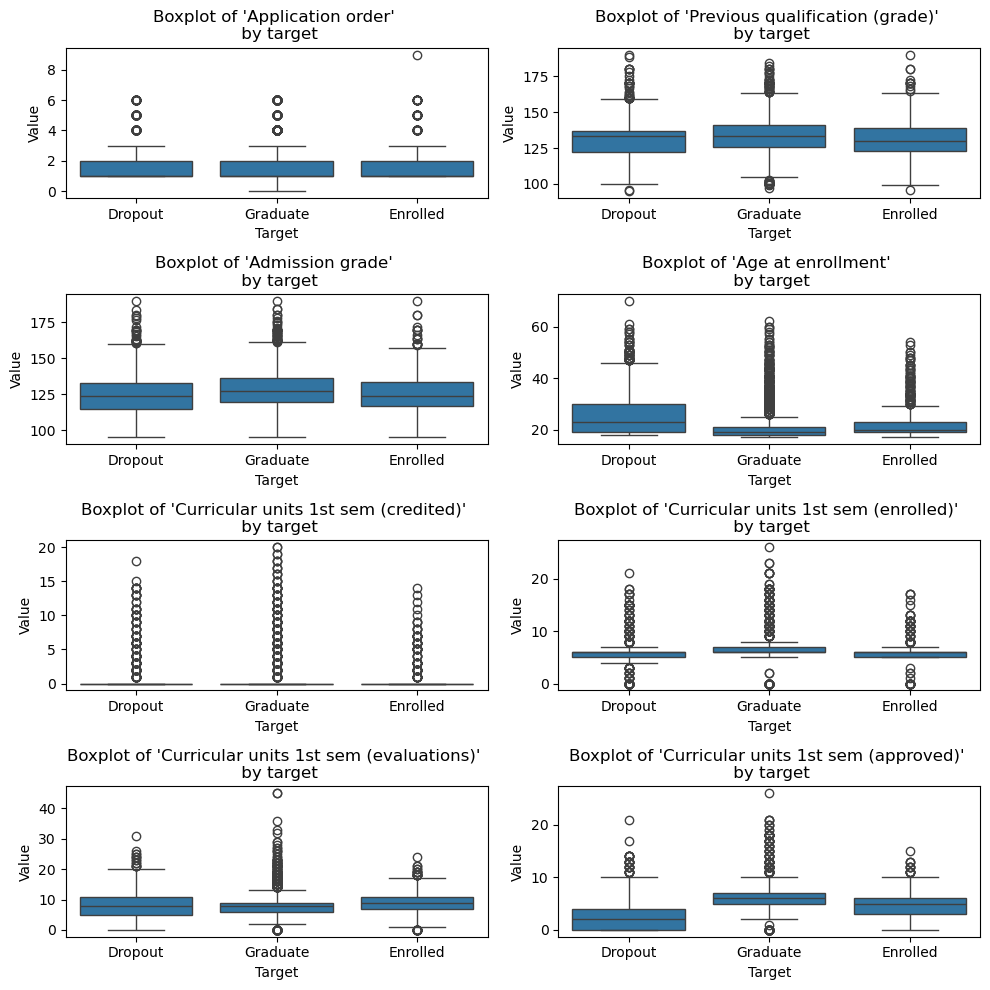

In [194]:
# Create a grid of subplots for feature columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

# Loop through each feature column (except 'Target')
for ax, col in zip(axes, df_num.columns[:-1]):

    # Create a box plot: x-axis shows the feature categories, y-axis shows the proportion,
    # and box are colored by 'Target'
    sns.boxplot(x='Target', y=col, data=df_num, ax=ax)
    ax.set_title(f"Boxplot of '{col}' \n by target")
    ax.set_ylabel("Value")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

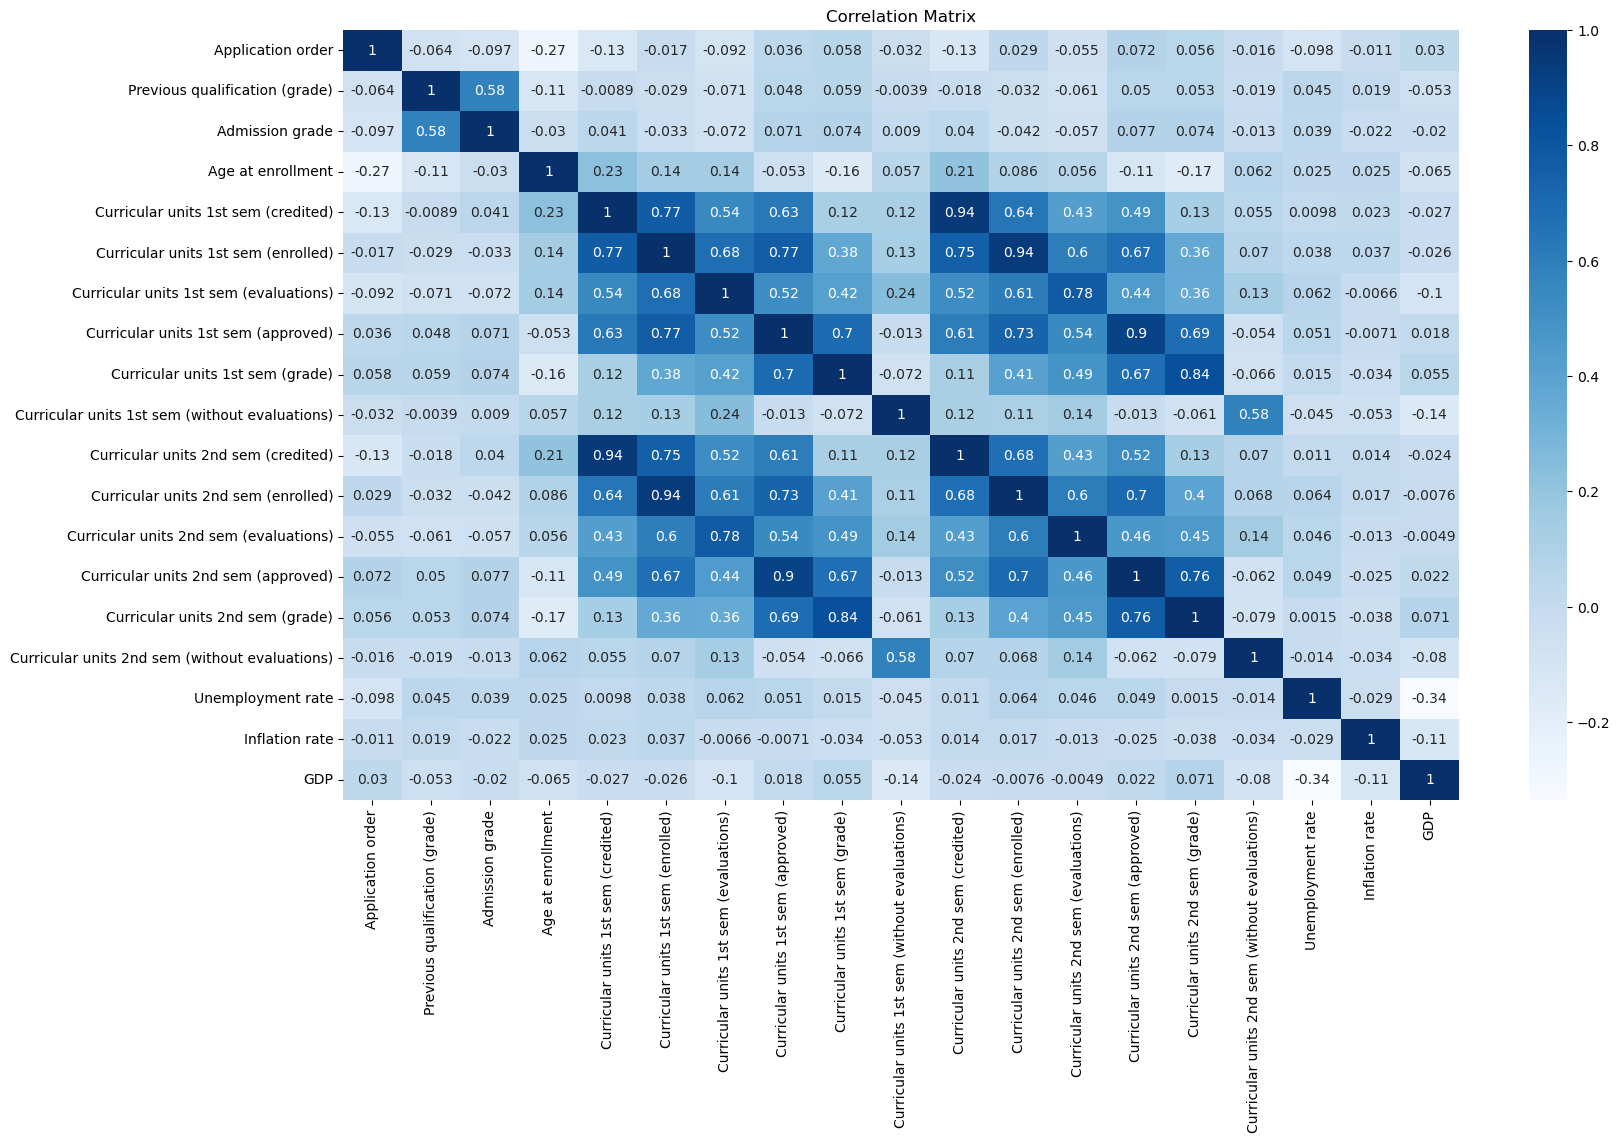

In [195]:
#Correlation matrix
plt.figure(figsize=(18, 10))
corr_matrix = df_num.drop(columns=['Target']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

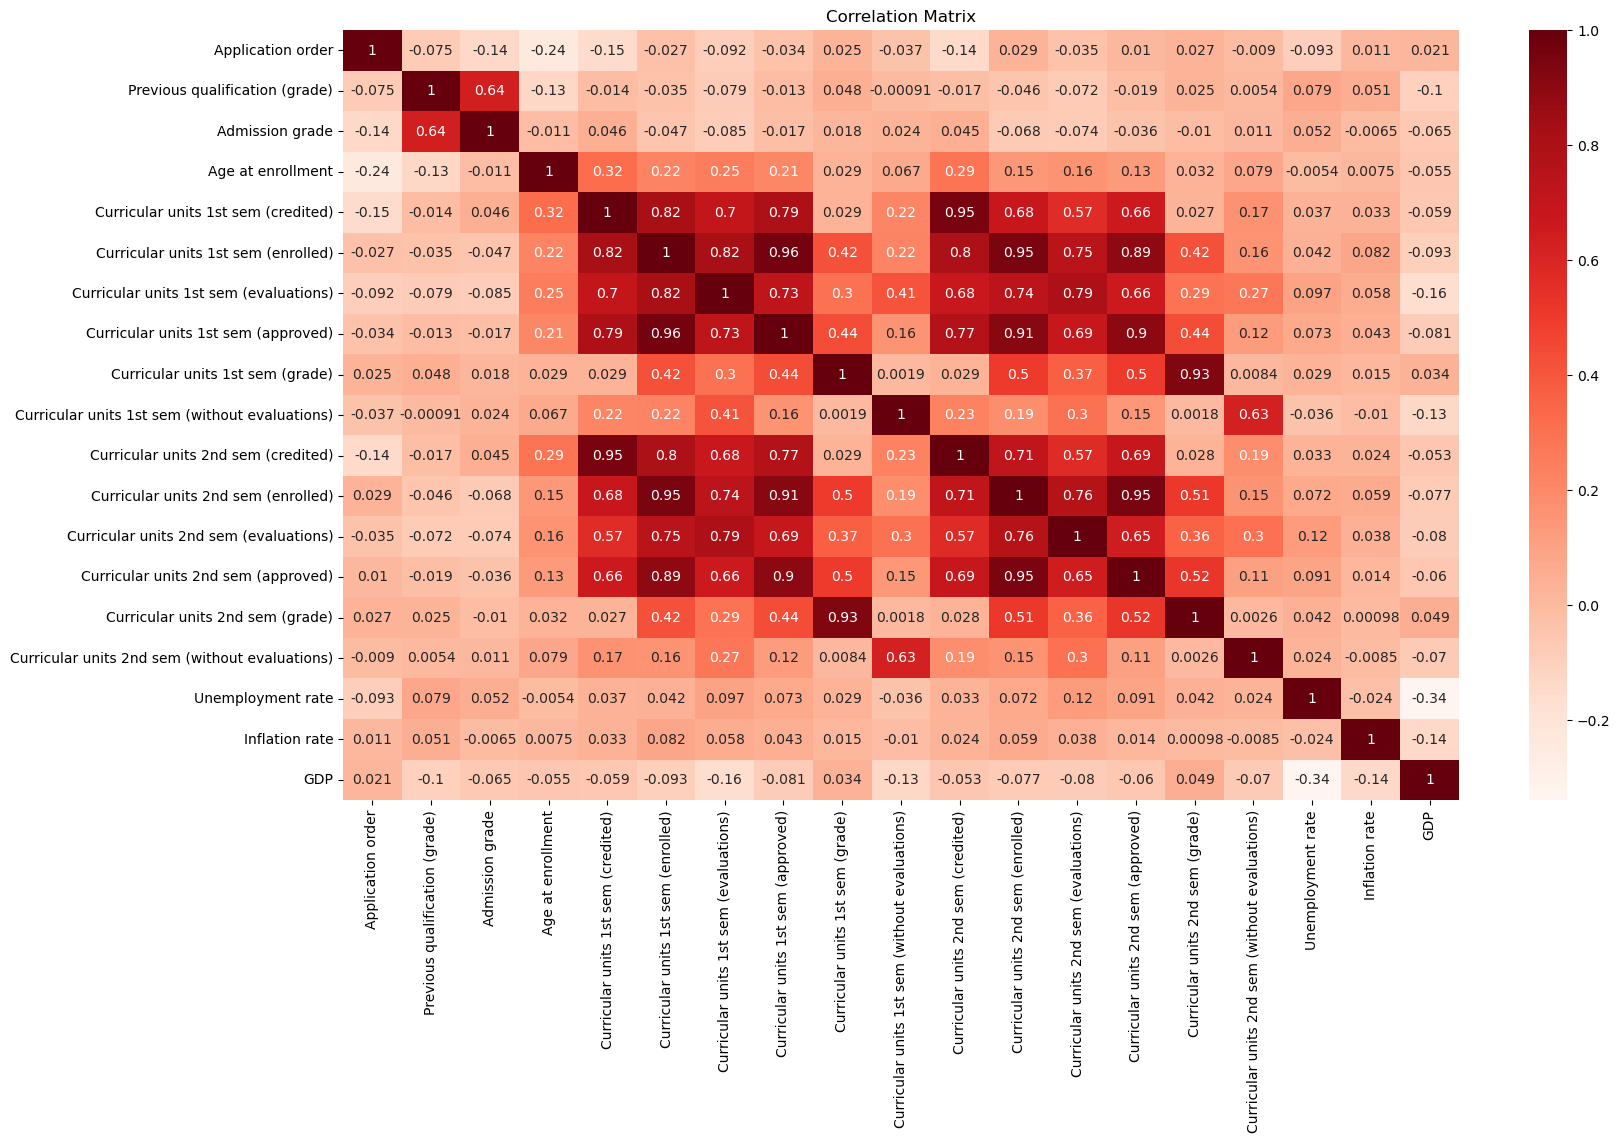

In [196]:
#Correlation matrix
plt.figure(figsize=(18, 10))
df_num_grad = df_num[df_num['Target'] == 'Graduate']
corr_matrix = df_num_grad.drop(columns=['Target']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

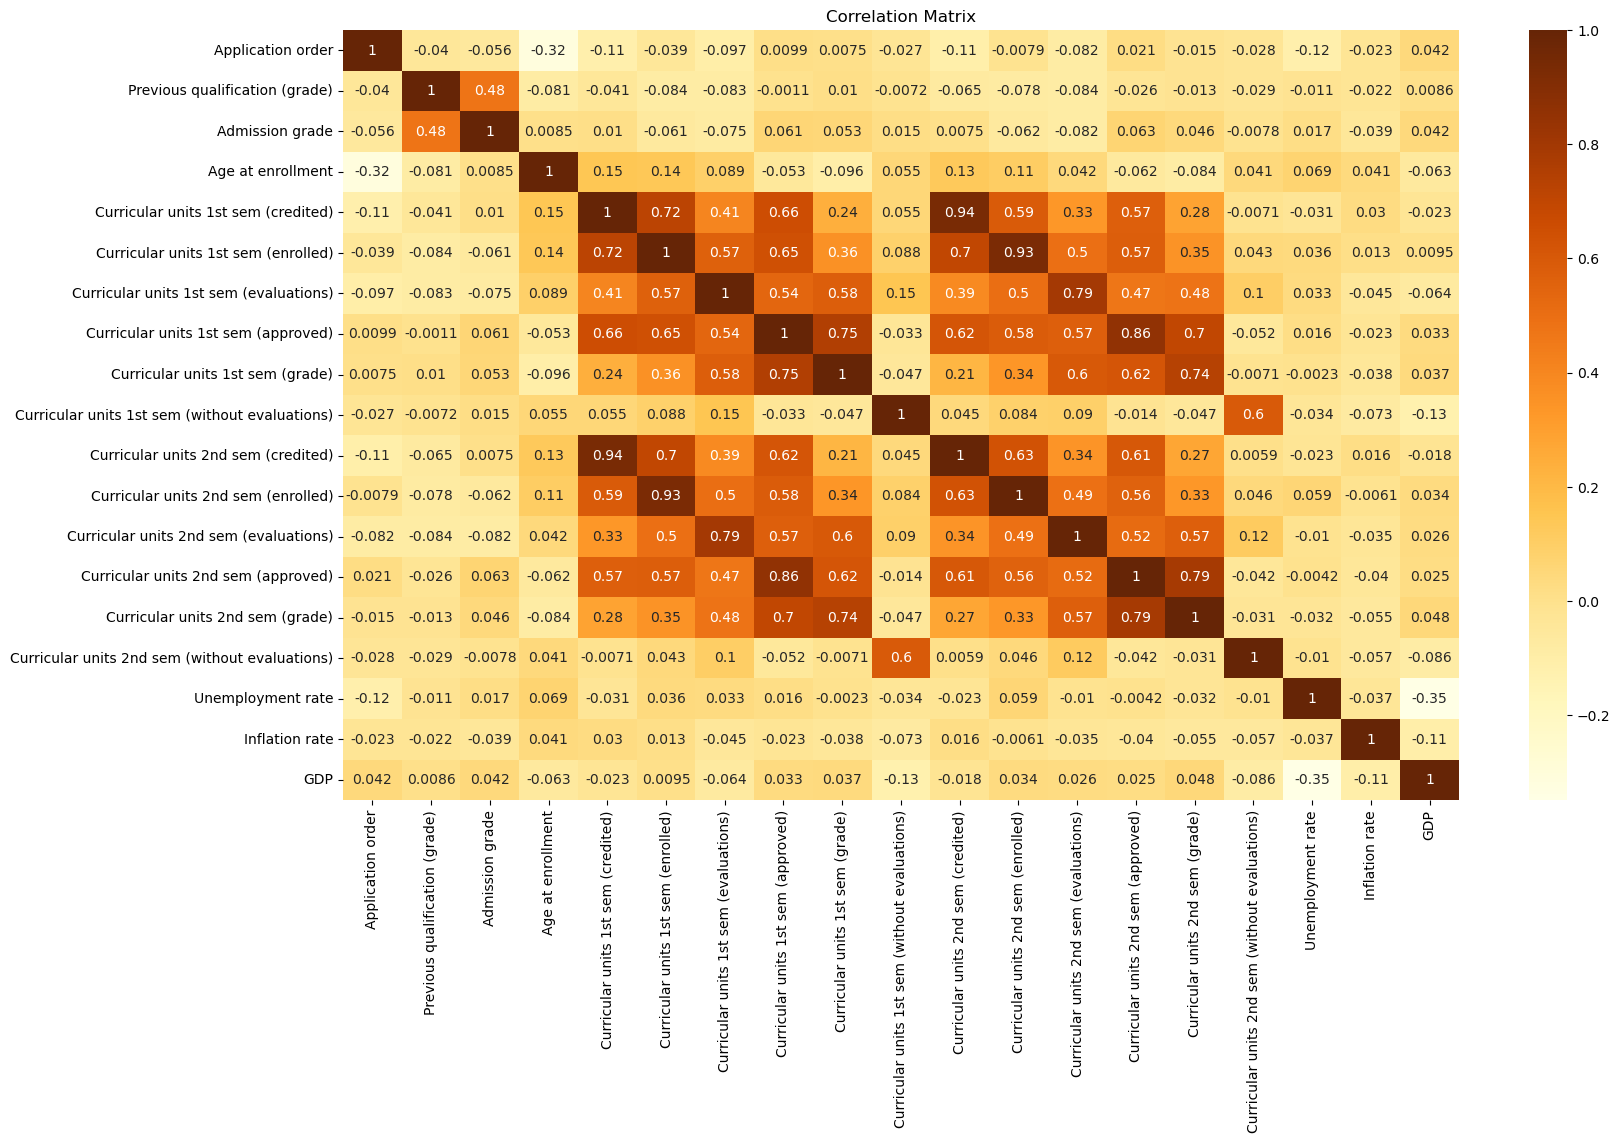

In [197]:
#Correlation matrix
plt.figure(figsize=(18, 10))
df_num_drop = df_num[df_num['Target'] == 'Dropout']
corr_matrix = df_num_drop.drop(columns=['Target']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

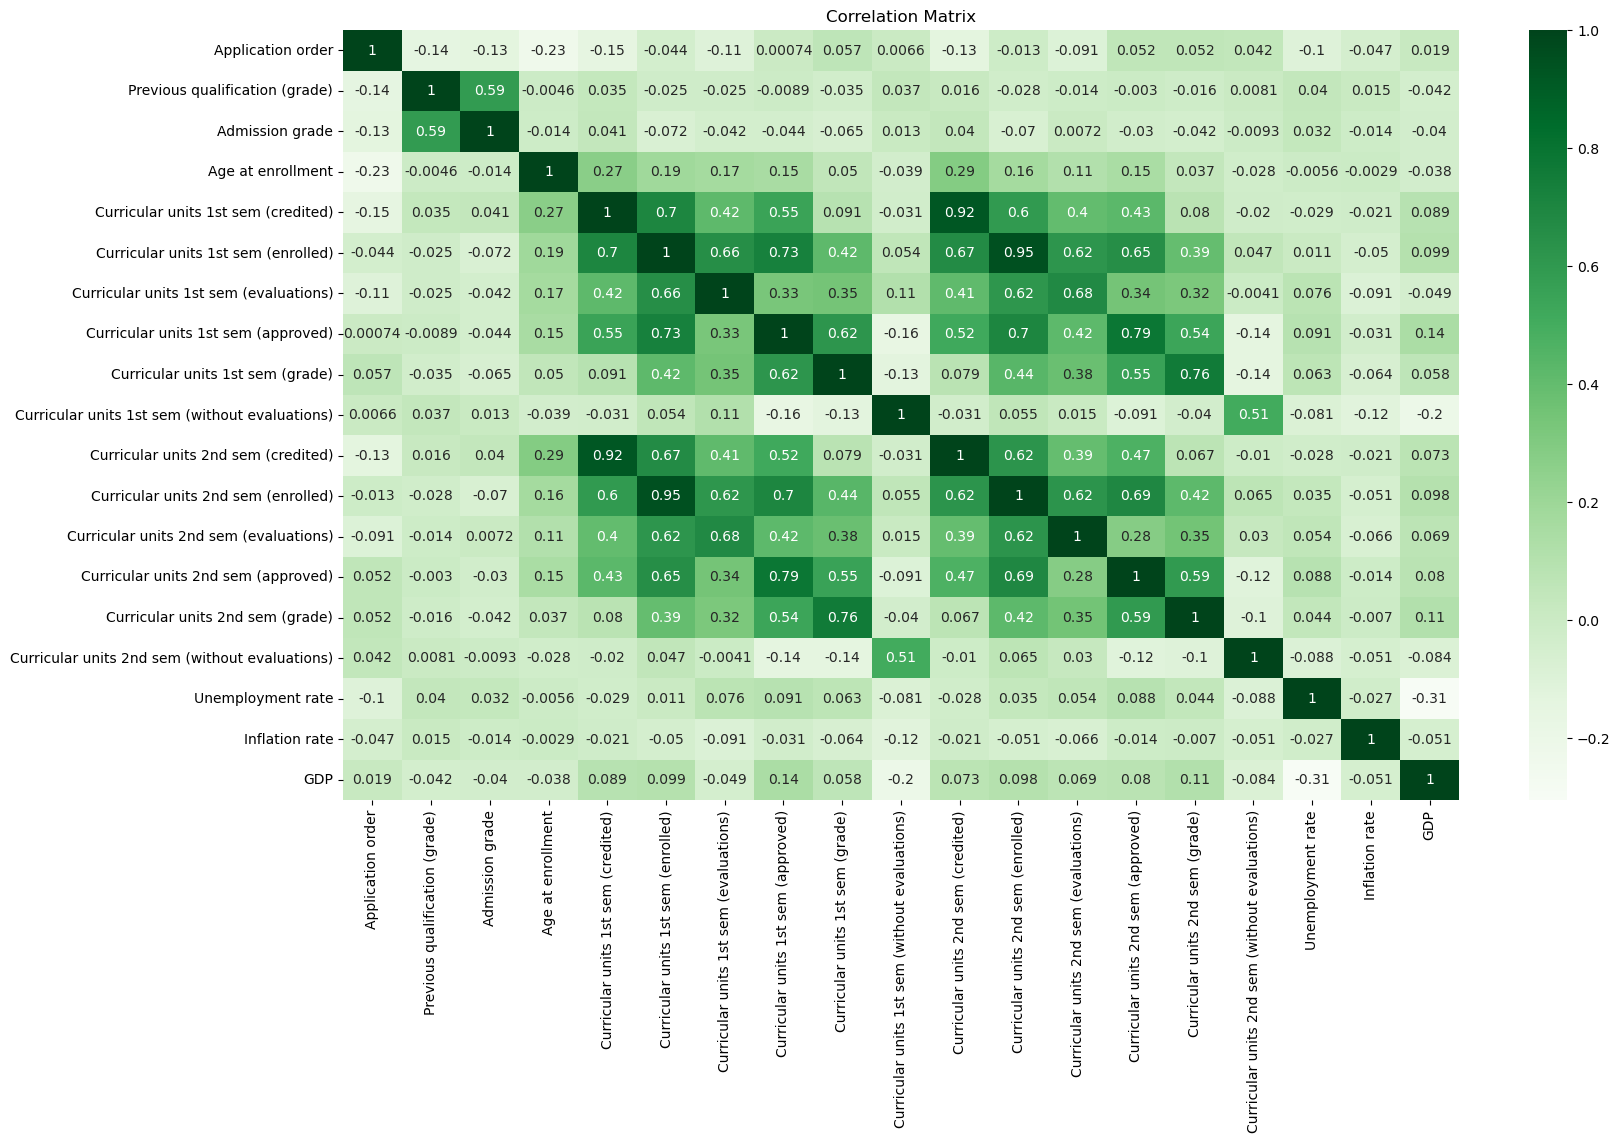

In [198]:
#Correlation matrix
plt.figure(figsize=(18, 10))
df_num_en = df_num[df_num['Target'] == 'Enrolled']
corr_matrix = df_num_en.drop(columns=['Target']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

<Figure size 3000x2000 with 0 Axes>

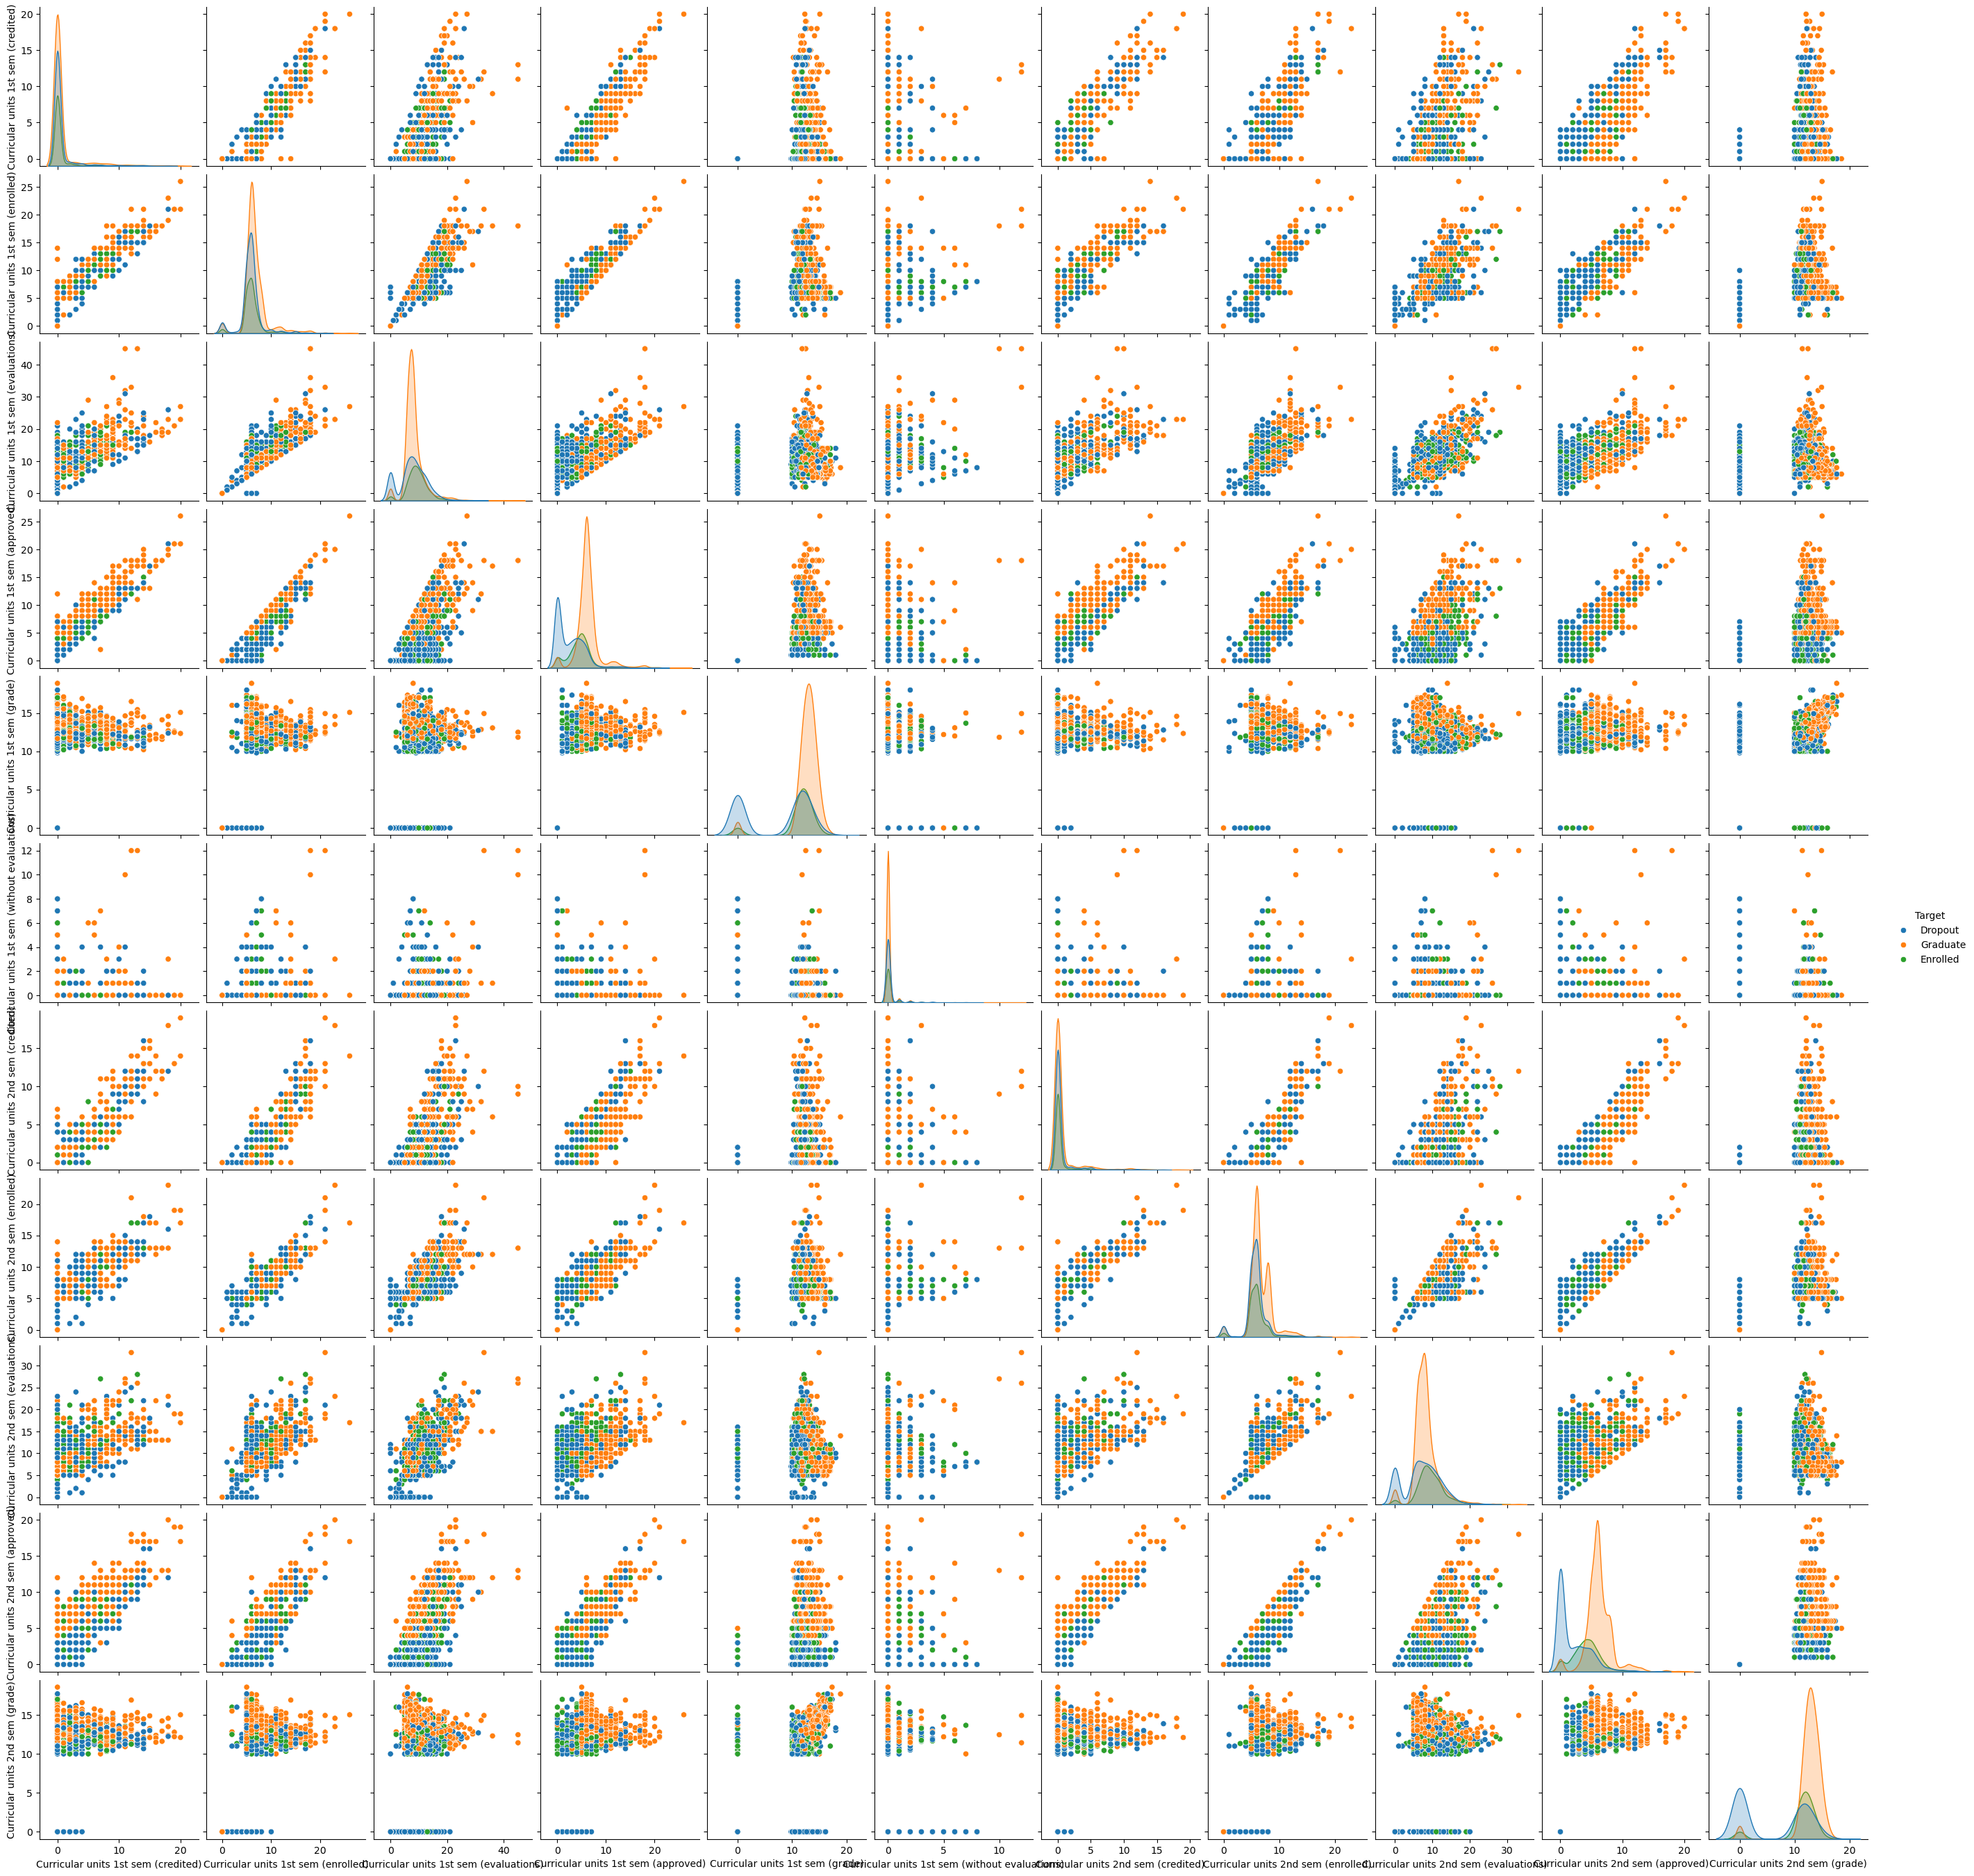

In [199]:
# Focus on variables with high correlations
df_num_scat = df_num.iloc[:,4:15].copy()
df_num_scat['Target'] = df_num['Target']

# Create a matrix of subplots for feature columns
plt.figure(figsize=(30, 20))
sns.pairplot(df_num_scat, hue='Target', diag_kind='kde')
plt.show()

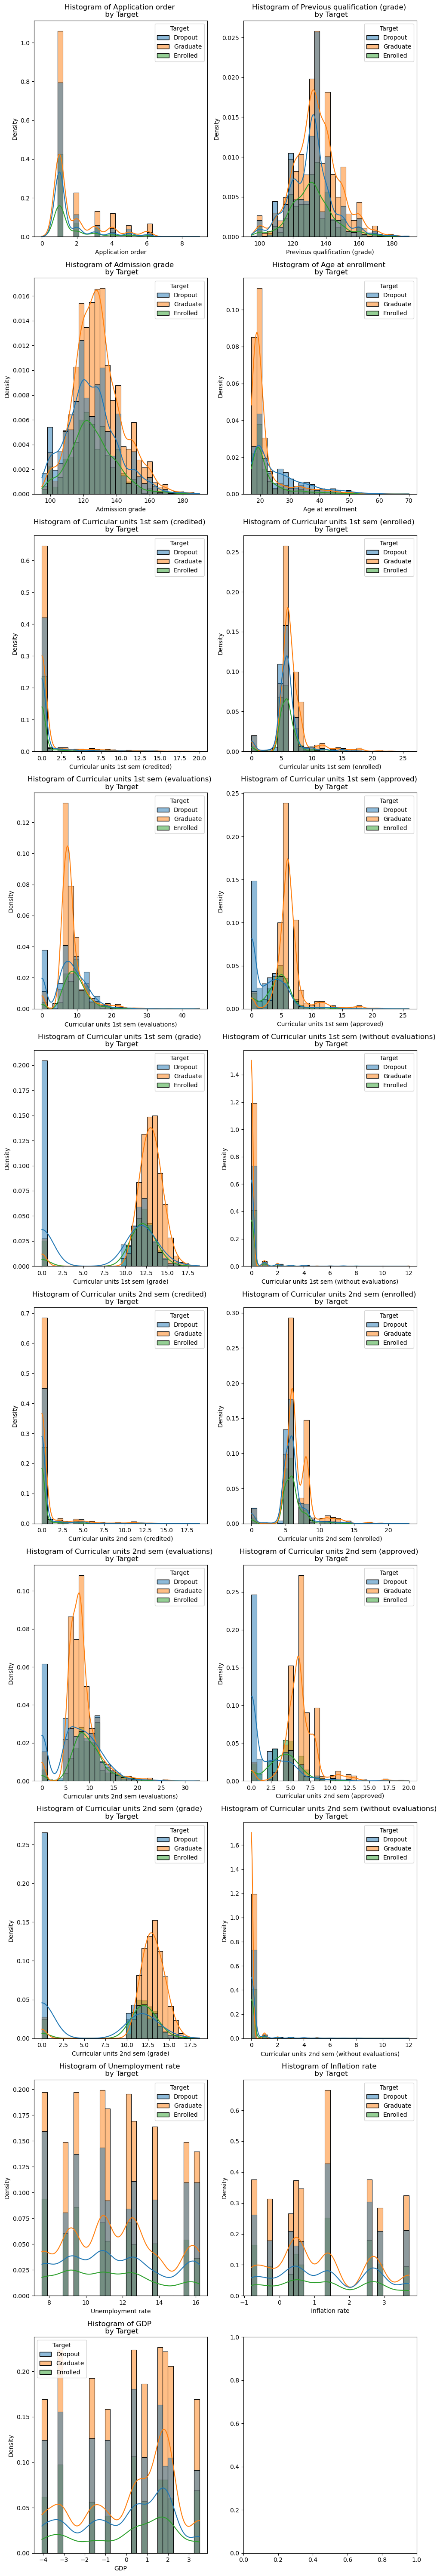

In [200]:
# Create a grid of subplots for feature columns
fig, axes = plt.subplots(10, 2, figsize=(10, 60))
axes = axes.flatten()

#Create histograms for each feature column
for ax, col in zip(axes, df_num.columns[:-1]):
    sns.histplot(data=df_num, x=col, hue='Target', kde=True, bins=30, ax=ax, stat='density')
    ax.set_title(f'Histogram of {col} \n by Target')
    ax.set_ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Notable findings

The proportion of examples on the label is imbalance. Resampling may be appropriate. Each category within the label has similar features and tend to cluster in some categories within each of the features. Notably, strong correlation exist between curricular units related variables across first and second semester, even disaggregated by categories within label. In terms of distribution of continuous features, examples labeled as 'Graduate' tend to have higher values compared to other labels. Interenstingly, values that can be considered favorable/expected to each labels are somehow reflected in the distribution of features that are continuous. For example, curriculum grades are majorly lower to examples labeled 'Dropout'. Coversely, curriculm units evaluated are high for examples labeled 'Graduated' or 'Enrolled'. With this, the trained model may result to unstable weights to group of correlated features.

# Preprocessing

Encode data base on its type and perform balance split data stratified by the labels with 70% allocated to training, 15% for validation, and 15% for testing.

In [201]:
# Encode variables
he = OneHotEncoder()
sc = StandardScaler()

# Encode categorical variables and scale continuous variables
x_cat = he.fit_transform(df[cat])
x_num = df.drop(columns=cat + bin + ['Target'])
x_num = sc.fit_transform(x_num)

# Combine encoded variables
x_bin = df[bin].to_numpy()
x = np.concatenate([x_cat.toarray(), x_bin, x_num], axis=1)
y = df['Target'].to_numpy()

# Create training, validation, and test set
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0, stratify=y_2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3096, 247)
(664, 247)
(664, 247)


In [202]:
# Apply SMOTE to the training and validation data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_val_res, y_val_res = smote.fit_resample(X_val, y_val)
print(X_train_res.shape)
print(X_val_res.shape)

(4638, 247)
(996, 247)


# Train and test regression models

Implement logistic regression (by default for multicall: OVR) using full feature space and utilizing feature selection.

## Logistic regregression

### Full feature space

Training accuracy: 0.79
Validation accuracy: 0.71
Test accuracy: 0.73


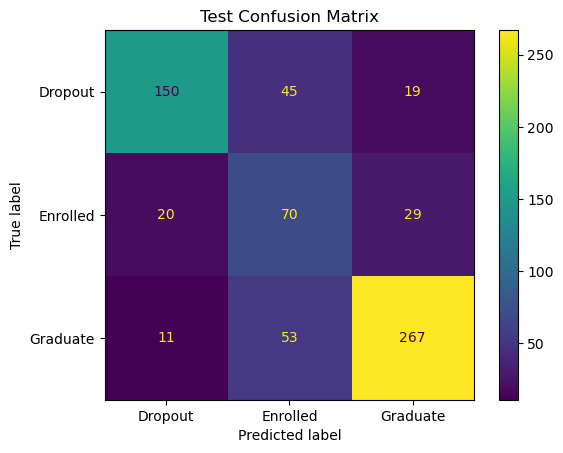

              precision    recall  f1-score   support

     Dropout       0.83      0.70      0.76       214
    Enrolled       0.42      0.59      0.49       119
    Graduate       0.85      0.81      0.83       331

    accuracy                           0.73       664
   macro avg       0.70      0.70      0.69       664
weighted avg       0.76      0.73      0.74       664



In [203]:
# Develop a logistic regression model
mdl = LogisticRegression(solver='newton-cg', random_state=0, penalty=None).fit(X_train_res, y_train_res)

# Evaluate the model
train_acc = mdl.score(X_train_res, y_train_res)
val_acc = mdl.score(X_val_res, y_val_res)
test_acc = mdl.score(X_test, y_test)

y_pred = mdl.predict(X_test)
report = classification_report(y_test, y_pred)

print(f"Training accuracy: {train_acc:.2f}")
print(f"Validation accuracy: {val_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Dropout", "Enrolled", "Graduate"])
cm_display.plot()
plt.title('Test Confusion Matrix')
plt.show()

print(report)

### Applying feature selection

In [204]:
# Perform RFE with LogisticRegression
rfe = RFE(mdl, n_features_to_select=50, step=1)
rfe.fit(X_train_res, y_train_res)

# Get the selected feature indices
selected_features_lr = rfe.get_support(indices=True)

# Print the selected feature indices
print("Selected features after RFE:")
print(selected_features_lr)


Selected features after RFE:
[  2   7  10  11  22  24  47  56  65  68  73  85  86  95  98  99 104 105
 106 115 119 132 142 143 144 145 146 147 148 149 150 151 153 154 155 156
 159 160 165 166 185 189 190 193 194 199 204 209 215 217]


Training accuracy after RFE: 0.42345838723587753
Validation accuracy after RFE: 0.3373493975903614
Test accuracy after RFE: 0.733433734939759
Classification Report after RFE for test:


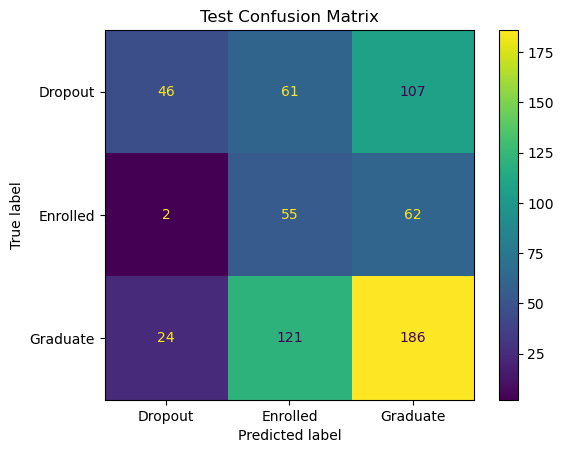

              precision    recall  f1-score   support

     Dropout       0.64      0.21      0.32       214
    Enrolled       0.23      0.46      0.31       119
    Graduate       0.52      0.56      0.54       331

    accuracy                           0.43       664
   macro avg       0.46      0.41      0.39       664
weighted avg       0.51      0.43      0.43       664



In [205]:
# Transform both training to selected features
X_train_rfe = rfe.transform(X_train_res)
X_val_rfe = rfe.transform(X_val_res)
X_test_rfe = rfe.transform(X_test)

# Fit logistic regression on the reduced dataset
mdl_rfe = mdl.fit(X_train_rfe, y_train_res)

# Evaluate the model
train_acc = mdl_rfe.score(X_train_rfe, y_train_res)
val_acc = mdl_rfe.score(X_val_rfe, y_val_res)
y_pred = mdl_rfe.predict(X_test_rfe)
report = classification_report(y_test, y_pred)

print("Training accuracy after RFE:", train_acc)
print("Validation accuracy after RFE:", val_acc)
print("Test accuracy after RFE:", test_acc)

print("Classification Report after RFE for test:")
cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Dropout", "Enrolled", "Graduate"])
cm_display.plot()
plt.title('Test Confusion Matrix')
plt.show()

print(report)

# Dimension reduction techniques

Illustrate the use of dimension reduction models such as PCA and LDA in comparison with supervise classification models like logistic regression.

## Preprocessing

In [206]:
# Scale continuous variables
x_num = df.drop(columns=cat + bin + ['Target'])
x_num = sc.fit_transform(x_num)

# Segregate feature and label variables
x = x_num
y = df['Target'].to_numpy()

# Create training, validation, and test set
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0, stratify=y_2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3096, 19)
(664, 19)
(664, 19)


In [207]:
# Apply SMOTE to the training and validation data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_val_res, y_val_res = smote.fit_resample(X_val, y_val)
print(X_train_res.shape)
print(X_val_res.shape)

(4638, 19)
(996, 19)


## Principal Component Analysis

### Dimension reduction

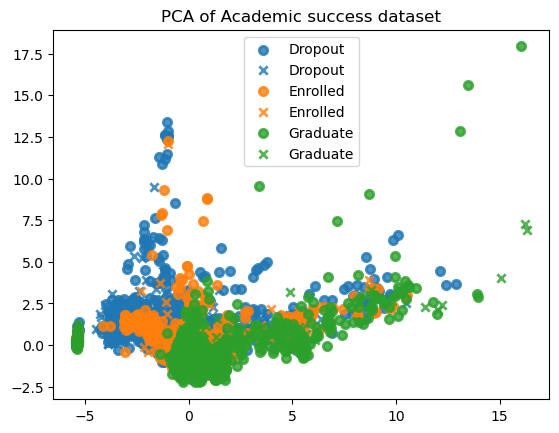

In [208]:
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_res, y_train_res)
X_test_pca = pca.transform(X_test)

# Define target names
target_names = np.unique(y_train_res)

# PCA Results
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_pca[y_train_res == target_name, 0], X_train_pca[y_train_res == target_name, 1], 
                color=color, alpha=0.8, lw=2, label=target_name)
    plt.scatter(X_test_pca[y_test == target_name, 0], X_test_pca[y_test == target_name, 1], 
                color=color, alpha=0.8, lw=2, label=target_name, marker='x')
    
plt.legend(loc="best", shadow=False)
plt.title("PCA of Academic success dataset")
plt.show()

### Classification

Training accuracy after PCA: 0.5948684777921518
Validation accuracy after PCA: 0.6194779116465864
Test accuracy after PCA: 0.6370481927710844


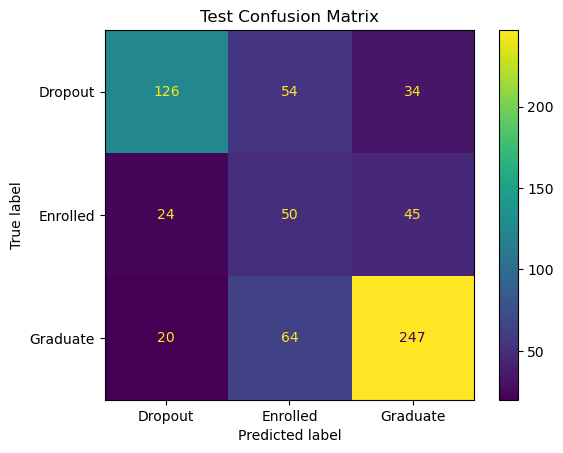

              precision    recall  f1-score   support

     Dropout       0.74      0.59      0.66       214
    Enrolled       0.30      0.42      0.35       119
    Graduate       0.76      0.75      0.75       331

    accuracy                           0.64       664
   macro avg       0.60      0.59      0.59       664
weighted avg       0.67      0.64      0.65       664



In [209]:
# Create a new logistic regression model
mdl_pca = LogisticRegression(solver='newton-cg', random_state=0, penalty=None).fit(X_train_pca, y_train_res)

# Transform validation data using PCA
X_val_pca = pca.transform(X_val_res)

# Evaluate the model
train_acc = mdl_pca.score(X_train_pca, y_train_res)
val_acc = mdl_pca.score(X_val_pca, y_val_res)
test_acc = mdl_pca.score(X_test_pca, y_test)

y_pred = mdl_pca.predict(X_test_pca)
report = classification_report(y_test, y_pred)

print("Training accuracy after PCA:", train_acc)
print("Validation accuracy after PCA:", val_acc)
print("Test accuracy after PCA:", test_acc)

cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Dropout", "Enrolled", "Graduate"])
cm_display.plot()
plt.title('Test Confusion Matrix')
plt.show()

print(report)

## Linear Discrimninant Analysis

### Dimension reduction

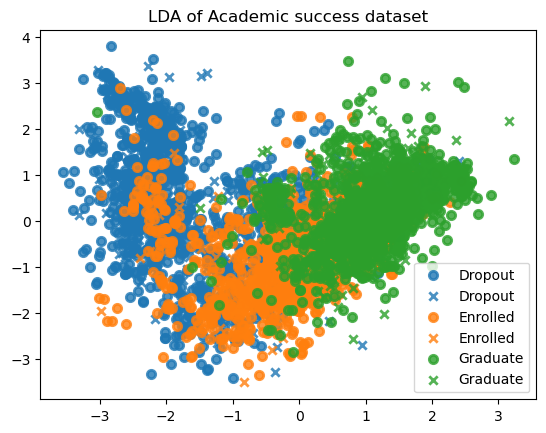

In [210]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_res, y_train_res)
X_test_lda = lda.transform(X_test)

# LDA Results
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_lda[y_train_res == target_name, 0], X_train_lda[y_train_res == target_name, 1], 
                color=color, alpha=0.8, lw=2, label=target_name)
    plt.scatter(X_test_lda[y_test == target_name, 0], X_test_lda[y_test == target_name, 1], 
                color=color, alpha=0.8, lw=2, label=target_name, marker='x')
    
plt.legend(loc="best", shadow=False)
plt.title("LDA of Academic success dataset")
plt.show()

### Classification

Training accuracy: 0.68
Validation accuracy: 0.69
Test accuracy: 0.72


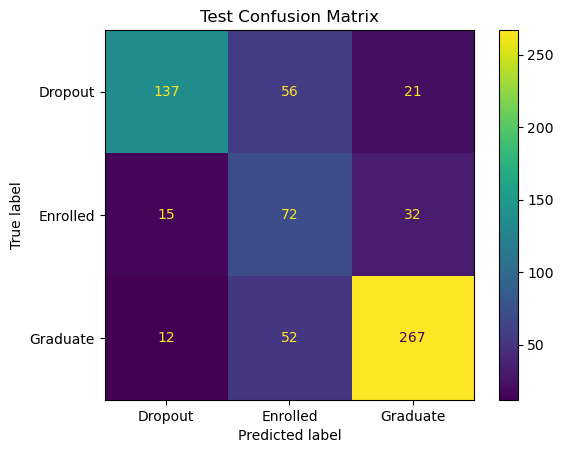

              precision    recall  f1-score   support

     Dropout       0.84      0.64      0.72       214
    Enrolled       0.40      0.61      0.48       119
    Graduate       0.83      0.81      0.82       331

    accuracy                           0.72       664
   macro avg       0.69      0.68      0.68       664
weighted avg       0.76      0.72      0.73       664



In [211]:
train_acc = lda.score(X_train_res, y_train_res)
val_acc = lda.score(X_val_res, y_val_res)
test_acc = lda.score(X_test, y_test)

print(f"Training accuracy: {train_acc:.2f}")
print(f"Validation accuracy: {val_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

y_pred = lda.predict(X_test)
report = classification_report(y_test, y_pred)

cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Dropout", "Enrolled", "Graduate"])
cm_display.plot()
plt.title('Test Confusion Matrix')
plt.show()

print(report)

# Conclusion

As a result, the model that yields the highest test accuracy is the logistic regression using the full feature space. The second model with higher accuracy is the linear discriminant analysis model, only a percent lower compared to the top model despite utilizing fewer features. Notably, both models have the same value for weighted accuracy. In terms of the distribution of frequencies across classes between actual and predicted labels, the result is similar, with examples labeled 'Dropout' having the highest precision followed by examples labeled 'Graduate'. Surprisingly, implementing recursive feature elimination to filter important features didn't resulted to a better test accuracy. In fact, the large proportion of examples labeled 'Dropout' are misclassified mostly as 'Graduate'. This exercise highlight the strength of dimension reduction, that is, against a model with large set of features, fewer features can yield to at par result illustrating decrease in dimension can have less loss of information.